In [18]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [19]:
actions = [
    'normal',
    'abnormal'
]
#여기에 numpy파일을 여러개 load하면 여러개의 동작데이터를 삽입할 수 있음.

import os

filePath = "dataset"
data = []
idx = 0
for (root, directories, files) in os.walk(filePath):
    for file in files:
        if file.startswith("raw"):# exclude raw dataset
            continue
        print(file)
        file_path = os.path.join(root, file)
        if np.load(file_path).shape[0] == 0:# exclude unavailable array
            continue
        if idx == 0:
            data = np.concatenate([
                np.load(file_path)
            ], axis=0)
        data = np.concatenate([
            np.array(data),
            np.load(file_path)
        ], axis=0)
        idx += 1

data.shape

seq_abnormal_1650107203.npy
seq_abnormal_1650107209.npy
seq_abnormal_1650107217.npy
seq_abnormal_1650107219.npy
seq_abnormal_1650107221.npy
seq_abnormal_1650107224.npy
seq_abnormal_1650107227.npy
seq_abnormal_1650107230.npy
seq_abnormal_1650107240.npy
seq_abnormal_1650107246.npy
seq_abnormal_1650107250.npy
seq_abnormal_1650107253.npy
seq_abnormal_1650107256.npy
seq_abnormal_1650107259.npy
seq_abnormal_1650107265.npy
seq_abnormal_1650107268.npy
seq_abnormal_1650107272.npy
seq_abnormal_1650107276.npy
seq_abnormal_1650107281.npy
seq_abnormal_1650107289.npy
seq_abnormal_1650107305.npy
seq_abnormal_1650107311.npy
seq_abnormal_1650107318.npy
seq_abnormal_1650107335.npy
seq_abnormal_1650107342.npy
seq_abnormal_1650107349.npy
seq_abnormal_1650107354.npy
seq_abnormal_1650107358.npy
seq_abnormal_1650107363.npy
seq_abnormal_1650107373.npy
seq_abnormal_1650107378.npy
seq_abnormal_1650107384.npy
seq_abnormal_1650107387.npy
seq_abnormal_1650107391.npy
seq_abnormal_1650107396.npy
seq_abnormal_1650107

(17936, 15, 162)

In [20]:
x_data = data[:, :, :-1] # 정답레이블 제거
labels = data[:, 0, -1] # 정답레이블 추출

print(x_data.shape)
print(labels.shape)

(17936, 15, 161)
(17936,)


In [21]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions)) # 원핫인코딩 (1,0,0), (0,1,0), (0,0,1)
y_data.shape

(17936, 2)

In [22]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2022) # 학습데이터와 검증데이터 분리

print(x_train.shape, y_train.shape) # 학습데이터 및 정답레이블
print(x_val.shape, y_val.shape) #검증데이터 및 정답레이블

(16142, 15, 161) (16142, 2)
(1794, 15, 161) (1794, 2)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model = Sequential([
    GRU(units=64, activation='relu', input_shape=x_train.shape[1:3]),
    Dropout(0.2),
    # GRU(units=64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=True),
    # Dropout(0.2),
    # GRU(units=64, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                43584     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 45,730
Trainable params: 45,730
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 256,
    epochs=100,
    callbacks=[
        ModelCheckpoint('models/modelV2_GRU_lying.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/100
63/64 [============================>.] - ETA: 0s - loss: 1.0821 - acc: 0.7320
Epoch 1: val_acc improved from -inf to 0.83501, saving model to models\modelV2_GRU_lying.h5
64/64 [==============================] - 2s 16ms/step - loss: 1.0814 - acc: 0.7321 - val_loss: 0.4094 - val_acc: 0.8350 - lr: 0.0010
Epoch 2/100
64/64 [==============================] - ETA: 0s - loss: 0.4365 - acc: 0.8246
Epoch 2: val_acc improved from 0.83501 to 0.87793, saving model to models\modelV2_GRU_lying.h5
64/64 [==============================] - 1s 14ms/step - loss: 0.4365 - acc: 0.8246 - val_loss: 0.2975 - val_acc: 0.8779 - lr: 0.0010
Epoch 3/100
62/64 [============================>.] - ETA: 0s - loss: 0.3444 - acc: 0.8615
Epoch 3: val_acc improved from 0.87793 to 0.88740, saving model to models\modelV2_GRU_lying.h5
64/64 [==============================] - 1s 13ms/step - loss: 0.3449 - acc: 0.8611 - val_loss: 0.2820 - val_acc: 0.8874 - lr: 0.0010
Epoch 4/100
63/64 [============================>.

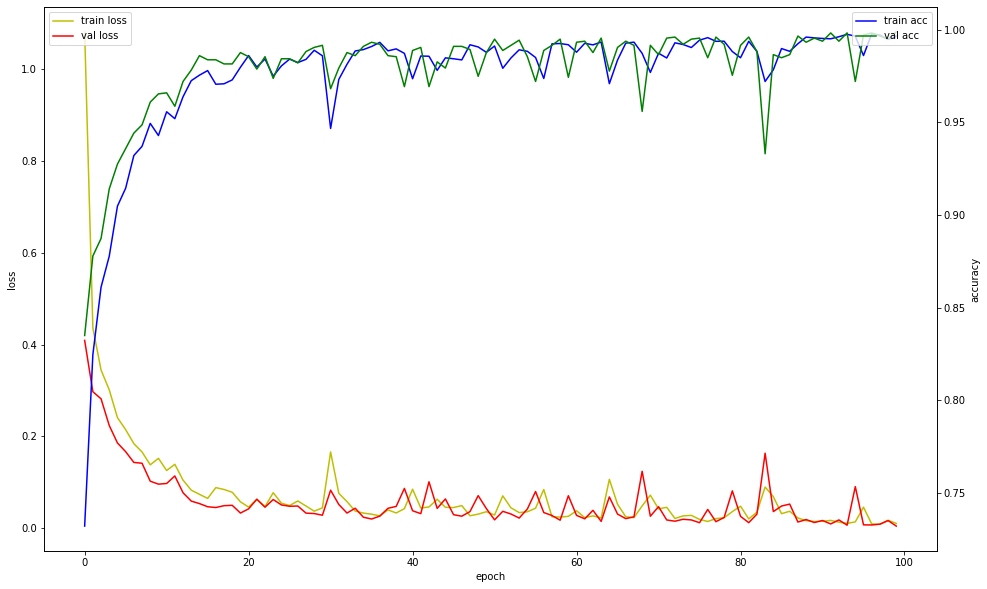

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [28]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/modelV2_GRU_lying.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[ 497,    2],
        [   0, 1295]],

       [[1295,    0],
        [   2,  497]]], dtype=int64)